In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
HistTrans=pd.read_csv('E:\DSE\DataStorm 4.0\DataStorm077\data-storm-4\Historical-transaction-data.csv')
StoreInfo = pd.read_csv('E:\DSE\DataStorm 4.0\DataStorm077\data-storm-4\Store-info.csv')
Test = pd.read_csv('E:\DSE\DataStorm 4.0\DataStorm077\data-storm-4\Testing-data.csv')

In [6]:
col1_min = HistTrans['item_price'].min()
col1_max = HistTrans['item_price'].max()

col2_min = HistTrans['quantity_sold'].min()
col2_max = HistTrans['quantity_sold'].max()

In [7]:
HistTrans = HistTrans[HistTrans['quantity_sold'] > 0]

In [8]:
df = HistTrans.copy()
df.dropna(inplace=True)
df1 = StoreInfo.copy()
df


,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5
...,...,...,...,...,...,...,...
473820,FIT O ORANGE 200ML,2021-11-14T00:00:00.000Z,8014206.0,ZEBZ,SHOP003,60,2
473821,BOTTLED DRINKING WATER 500ML,2021-10-16T00:00:00.000Z,8304754.0,AFR6,SHOP127,35,2
473822,GINGER BEER 1.5L,2021-10-16T00:00:00.000Z,8304807.0,J2A6,SHOP127,220,1
473823,BOTTLED DRINKING WATER 500ML,2021-11-07T00:00:00.000Z,8313570.0,1S0U,SHOP127,35,1


In [9]:
HistTrans.isna().sum()

item_description    35554
transaction_date        0
invoice_id           6216
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

### Check outliers

In [10]:
# create a new column 'BRAND' by splitting the ITEM string and taking the first element
df['brand'] = df['item_description'].str.split().str[:-1].str.join(' ')

# create a new column 'CAPACITY' by splitting the ITEM string and taking the last element
df['capacity'] = df['item_description'].str.split().str[-1]

def process_value(val):
    if pd.notnull(val):  # ignore NaN values
        if 'ML' in val:
            val = val.replace('ML', '').strip()
            val = (float(val) / 1000)  
        elif 'L' in val:
            val = val.replace('L', '').strip()
            val = int(float(val))  # convert to int
    return val

# apply the function to the column
df['capacity'] = df['capacity'].apply(process_value)

In [11]:
df.isna().sum()

item_description    0
transaction_date    0
invoice_id          0
customer_id         0
shop_id             0
item_price          0
quantity_sold       0
brand               0
capacity            0
dtype: int64

In [12]:
grouped_brand = df.groupby(['brand','capacity'])['quantity_sold'].sum()
grouped_brand.head(20)

brand                   capacity
BOTTLED DRINKING WATER  0.50         42596
                        1.00         18407
CHOCOLATE MILK          0.18            26
CREAM SODA              0.50         56976
                        1.00         77300
CREAM SODA APPLE POP    1.00         20122
DRY GINGER ALE PET      0.50         11978
FIT O MANGO             0.20         14903
                        1.00         10684
FIT O MIXED FRUIT       0.20         18384
                        1.00         11699
FIT O ORANGE            0.20         23125
                        1.00         26385
GINGER BEER             0.40          5870
                        0.50         20518
                        1.00        141442
GINGER BEER SUGAR FREE  0.50         10727
KIK COLA                1.00          4008
LEMONADE                0.50         10727
                        1.00         25279
Name: quantity_sold, dtype: int64

In [13]:
# group the items by their brand and capacity, and count the number of unique prices
grouped = df.groupby(["brand", "capacity"])["item_price"].nunique()

# get the items with the same brand and capacity but different prices
diff_prices = grouped[grouped > 1]

# print the items with different prices
if not diff_prices.empty:
    print("The following items have the same brand and capacity but different prices:")
    # df[df[["BRAND", "CAPACITY"]].apply(tuple, axis=1).isin(diff_prices.index)]
    print(diff_prices)
else:
    print("All items with the same brand and capacity have the same price.")

The following items have the same brand and capacity but different prices:
brand                   capacity
BOTTLED DRINKING WATER  0.50        54
                        1.00        25
CHOCOLATE MILK          0.18         4
CREAM SODA              0.50        15
                        1.00        23
CREAM SODA APPLE POP    1.00         7
DRY GINGER ALE PET      0.50        22
FIT O MANGO             0.20        42
                        1.00        17
FIT O MIXED FRUIT       0.20        49
                        1.00        17
FIT O ORANGE            0.20        52
                        1.00        18
GINGER BEER             0.40        17
                        0.50        16
                        1.00        20
GINGER BEER SUGAR FREE  0.50        14
KIK COLA                1.00        10
LEMONADE                0.50        14
                        1.00        22
NECTO                   0.50        13
                        1.00        19
ORANGE BARLEY           1.00      

In [14]:
grouped.shape

(32,)

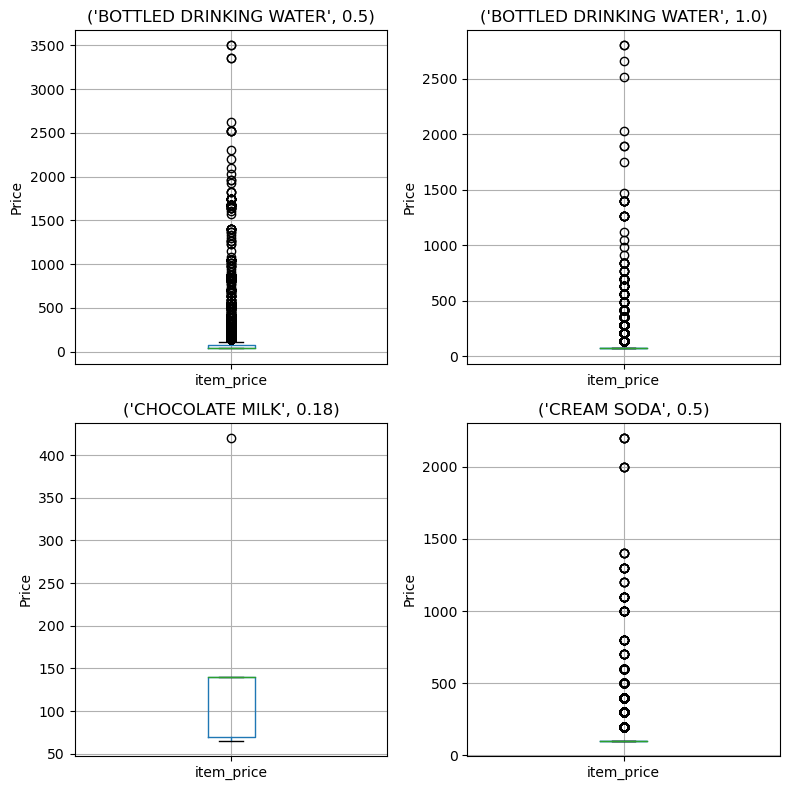

In [15]:
# group the items by their brand and capacity
grouped = df.groupby(["brand", "capacity"])

# get the first 4 groups (sorted by brand and capacity)
first_4_groups = list(grouped)[:4]

# plot the price distribution for each of the first 4 groups
fig, axes = plt.subplots(nrows=len(first_4_groups) // 2, ncols=2, figsize=(8, 4*len(first_4_groups) // 2))
for i, (name, group) in enumerate(first_4_groups):
    ax = axes[i // 2, i % 2]
    group.boxplot(column="item_price", ax=ax)
    ax.set_title(name)
    ax.set_xlabel("")
    ax.set_ylabel("Price")
plt.tight_layout()
plt.show()

In [16]:
diff_prices_df = pd.DataFrame(diff_prices).reset_index()
diff_prices_df.rename(columns={'item_price':'num_unique_prices'}, inplace=True)
diff_prices_df.head(10)

,brand,capacity,num_unique_prices
0,BOTTLED DRINKING WATER,0.50,54
1,BOTTLED DRINKING WATER,1.00,25
2,CHOCOLATE MILK,0.18,4
3,CREAM SODA,0.50,15
4,CREAM SODA,1.00,23
5,CREAM SODA APPLE POP,1.00,7
6,DRY GINGER ALE PET,0.50,22
7,FIT O MANGO,0.20,42
8,FIT O MANGO,1.00,17
9,FIT O MIXED FRUIT,0.20,49


In [17]:
# find outliers in the price distribution of each group brand, capacity group using IQR method and print the result
outlers_count = []

for name, group in grouped:
    q1 = group["item_price"].quantile(0.25)
    q3 = group["item_price"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = group[(group["item_price"] < lower_bound) | (group["item_price"] > upper_bound)]
    # if not outliers.empty:
    #     print("{}:".format(name), end=" ")
    #     print(len(outliers))

    outlers_count.append((name[0], name[1], len(outliers),  round(len(outliers)/len(group) * 100, 2)))

In [18]:
outliers_df = pd.DataFrame(outlers_count, columns=["BRAND", "CAPACITY", "num_outliers", "outliers_percentage"])
outliers_df.sort_values(by="outliers_percentage", ascending=False).head(10)

,BRAND,CAPACITY,num_outliers,outliers_percentage
10,FIT O MIXED FRUIT,1.0,2498,36.50
8,FIT O MANGO,1.0,1816,28.47
4,CREAM SODA,1.0,11234,26.89
25,ORANGE CRUSH,1.0,2479,25.63
22,NECTO,1.0,5810,25.58
1,BOTTLED DRINKING WATER,1.0,2240,24.87
19,LEMONADE,1.0,3366,22.28
16,GINGER BEER SUGAR FREE,0.5,1191,20.81
12,FIT O ORANGE,1.0,3069,20.73
13,GINGER BEER,0.4,629,19.91


In [19]:
#plot a graph to visualize the percentage of outlier in each brand, capacity group. 
#display brand and capacity as a one label in x column 


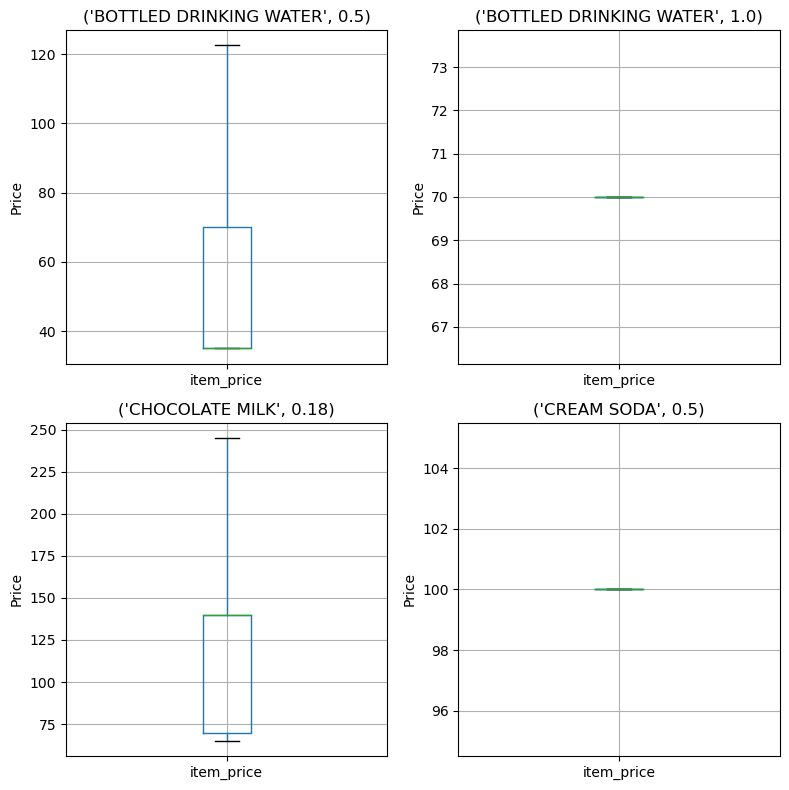

In [20]:
# fix outliers in the price distribution of each group brand, capacity group using IQR method
for name, group in grouped:
    q1 = group["item_price"].quantile(0.25)
    q3 = group["item_price"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = group[(group["item_price"] < lower_bound) | (group["item_price"] > upper_bound)]
    if not outliers.empty:
        group["item_price"] = group["item_price"].clip(lower_bound, upper_bound)

    # copy the fixed group back to the original dataframe
    df.loc[group.index] = group

# get the first 4 groups (sorted by brand and capacity)
first_4_groups = list(grouped)[:4]

# plot the price distribution for each of the first 4 groups
fig, axes = plt.subplots(nrows=len(first_4_groups) // 2, ncols=2, figsize=(8, 4*len(first_4_groups) // 2))
for i, (name, group) in enumerate(first_4_groups):
    ax = axes[i // 2, i % 2]
    group.boxplot(column="item_price", ax=ax)
    ax.set_title(name)
    ax.set_xlabel("")
    ax.set_ylabel("Price")
plt.tight_layout()
plt.show()

In [21]:
# create month and year columns
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format="%Y-%m-%dT%H:%M:%S.%fZ", errors='raise')
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day

In [22]:
grouped2 = df.drop(['invoice_id', 'month', 'day', 'quantity_sold'], axis=1).groupby(["brand", "capacity"])

In [23]:
grouped2 = df.groupby(["brand", "capacity"])

# find outliers in the price distribution of each group brand, capacity group using IQR method and print the result
outlers_count2 = []

for name, group in grouped2:
    q1 = group["item_price"].quantile(0.25)
    q3 = group["item_price"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = group[(group["item_price"] < lower_bound) | (group["item_price"] > upper_bound)]
    # if not outliers.empty:
    #     print("{}:".format(name), end=" ")
    #     print(len(outliers))

    outlers_count2.append((name[0], name[1], len(outliers),  round(len(outliers)/len(group) * 100, 2)))

outliers_df2 = pd.DataFrame(outlers_count2, columns=["brand", "capacity", "num_outliers", "outliers_percentage"])
outliers_df2.sort_values(by="outliers_percentage", ascending=False).head(10)

,brand,capacity,num_outliers,outliers_percentage
0,BOTTLED DRINKING WATER,0.50,0,0.0
1,BOTTLED DRINKING WATER,1.00,0,0.0
30,TONIC PET,0.50,0,0.0
29,STRAWBERRY MILK,0.18,0,0.0
28,SODA PET,1.00,0,0.0
27,SODA,1.00,0,0.0
26,SODA,0.50,0,0.0
25,ORANGE CRUSH,1.00,0,0.0
24,ORANGE CRUSH,0.50,0,0.0
23,ORANGE BARLEY,1.00,0,0.0


### Create new features

In [24]:
df['sale_amount'] = df['item_price'] * df['quantity_sold']

In [25]:
df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,brand,capacity,year,month,day,sale_amount
0,ORANGE BARLEY 1.5L,2021-12-11,147.0,BGXA,SHOP008,220.0,2,ORANGE BARLEY,1.00,2021,12,11,440.0
1,GINGER BEER 1.5L,2021-10-17,371.0,IA25,SHOP112,220.0,2,GINGER BEER,1.00,2021,10,17,440.0
2,TONIC PET 500ML,2021-12-13,484.0,VN7V,SHOP008,160.0,2,TONIC PET,0.50,2021,12,13,320.0
3,CREAM SODA 1L,2021-12-13,484.0,VN7V,SHOP008,220.0,2,CREAM SODA,1.00,2021,12,13,440.0
4,STRAWBERRY MILK 180ML,2021-10-23,1310.0,7S00,SHOP112,210.0,5,STRAWBERRY MILK,0.18,2021,10,23,1050.0


Drop the year column because all transactions are from 2021.

In [26]:
df.drop(['year'], axis=1, inplace=True)

In [27]:
# caluculate daily income for each store
df['daily_income'] = df.groupby(['shop_id', 'month', 'day'])['sale_amount'].transform('sum')
df['daily_income'] = df['daily_income'] / df.groupby(['shop_id', 'month', 'day'])['shop_id'].transform('count')
df[df['shop_id'] == 'SHOP008']

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,brand,capacity,month,day,sale_amount,daily_income
0,ORANGE BARLEY 1.5L,2021-12-11,147.0,BGXA,SHOP008,220.0,2,ORANGE BARLEY,1.0,12,11,440.0,352.837838
2,TONIC PET 500ML,2021-12-13,484.0,VN7V,SHOP008,160.0,2,TONIC PET,0.5,12,13,320.0,291.562500
3,CREAM SODA 1L,2021-12-13,484.0,VN7V,SHOP008,220.0,2,CREAM SODA,1.0,12,13,440.0,291.562500
2789,GINGER BEER 1.5L,2021-12-10,1000053.0,VT9C,SHOP008,220.0,1,GINGER BEER,1.0,12,10,220.0,368.909091
2790,GINGER BEER 1.5L,2021-12-10,1000057.0,8QLS,SHOP008,325.0,1,GINGER BEER,1.0,12,10,325.0,368.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460984,CREAM SODA 1.5L,2021-12-14,4000473.0,G21W,SHOP008,220.0,2,CREAM SODA,1.0,12,14,440.0,322.222222
460985,GINGER BEER 500ML,2021-12-14,4000473.0,G21W,SHOP008,100.0,2,GINGER BEER,0.5,12,14,200.0,322.222222
467818,LEMONADE 1.5L,2021-12-11,2000199.0,2FO5,SHOP008,220.0,1,LEMONADE,1.0,12,11,220.0,352.837838
467819,LEMONADE 500ML,2021-12-11,2000199.0,2FO5,SHOP008,100.0,2,LEMONADE,0.5,12,11,200.0,352.837838


In [28]:
# get the median daily income for each store
income_df = df.groupby(['shop_id'])['daily_income'].median().reset_index()
income_df.rename(columns={'daily_income': 'median_daily_income'}, inplace=True)

<Axes: xlabel='median_daily_income', ylabel='Count'>

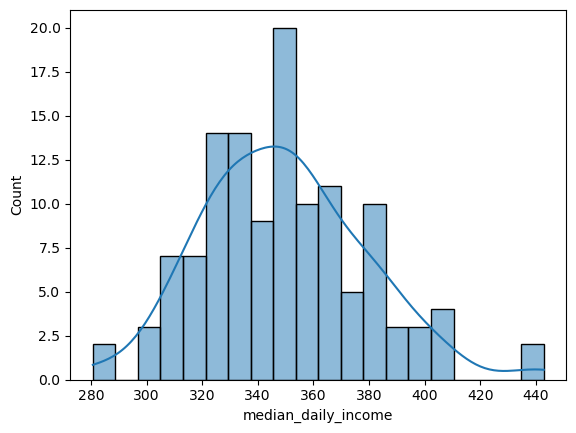

In [29]:
# distribution for median daily income histplot with kde
sns.histplot(data=income_df, x='median_daily_income', kde=True, bins=20)

In [30]:
df1 = pd.merge(df1, income_df, on='shop_id', how='left')

In [31]:
sales_by_shop = df.groupby('shop_id')['sale_amount'].sum().reset_index()
sales_by_shop.rename(columns={'sale_amount': 'total_sales'}, inplace=True)
sales_by_shop.head()

,shop_id,total_sales
0,SHOP001,652980.0
1,SHOP002,1654360.0
2,SHOP003,1165290.0
3,SHOP004,1113467.5
4,SHOP005,1215870.0


In [32]:
df1 = df1.merge(sales_by_shop, how='left', on='shop_id')
df1.head()

,shop_id,shop_area_sq_ft,shop_profile,median_daily_income,total_sales
0,SHOP047,528,Moderate,335.000000,518100.0
1,SHOP009,676,High,313.661972,1235110.0
2,SHOP083,676,Low,334.921875,1097305.0
3,SHOP117,676,Low,386.315789,1418840.0
4,SHOP042,676,Low,312.763158,922495.0


<Axes: xlabel='shop_id', ylabel='total_sales'>

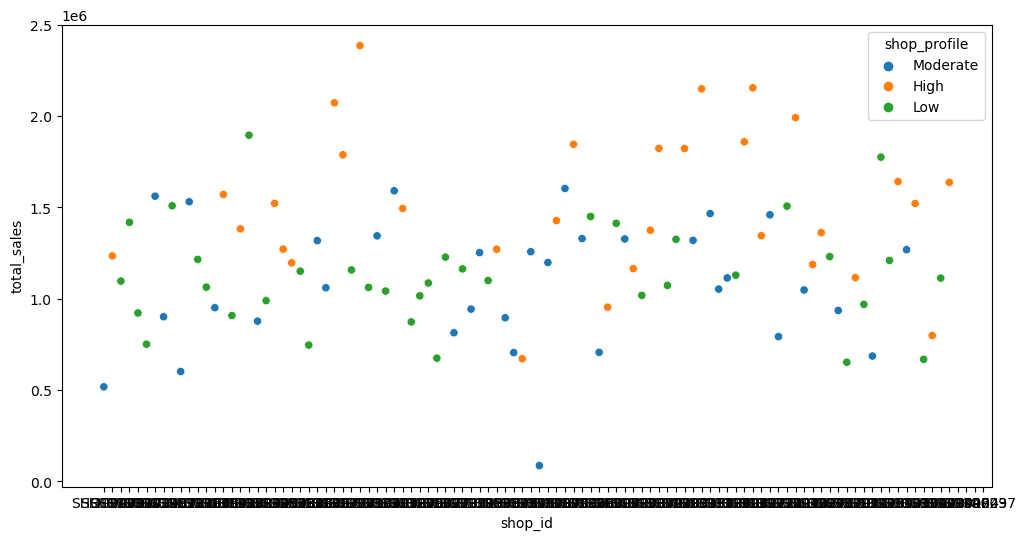

In [33]:
# scatterplot of sales amount and shop id
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='shop_id', y='total_sales', data=df1, hue='shop_profile', ax=ax)

In [34]:
df1['total_sales_per_sqft'] = df1['total_sales'] / df1['shop_area_sq_ft']
df1.head()

,shop_id,shop_area_sq_ft,shop_profile,median_daily_income,total_sales,total_sales_per_sqft
0,SHOP047,528,Moderate,335.000000,518100.0,981.250000
1,SHOP009,676,High,313.661972,1235110.0,1827.085799
2,SHOP083,676,Low,334.921875,1097305.0,1623.232249
3,SHOP117,676,Low,386.315789,1418840.0,2098.875740
4,SHOP042,676,Low,312.763158,922495.0,1364.637574


<Axes: xlabel='shop_id', ylabel='total_sales_per_sqft'>

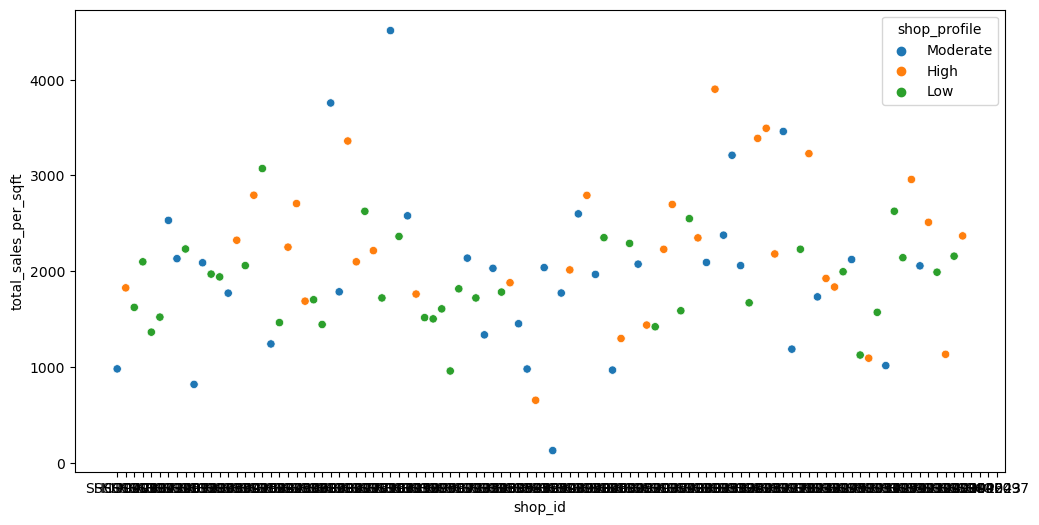

In [35]:
# scatterplot of sales amount per square fett and shop id hue by shop profile
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='shop_id', y='total_sales_per_sqft', data=df1, hue='shop_profile', ax=ax)

In [36]:
customers_per_shop = HistTrans.groupby('shop_id')['customer_id'].nunique().reset_index(name='num_unique_customers')
customers_per_shop.head()

,shop_id,num_unique_customers
0,SHOP001,1106
1,SHOP002,2546
2,SHOP003,2038
3,SHOP004,1724
4,SHOP005,2189


In [37]:
df1 = df1.merge(customers_per_shop, how='left', on='shop_id')
df1.head()

,shop_id,shop_area_sq_ft,shop_profile,median_daily_income,total_sales,total_sales_per_sqft,num_unique_customers
0,SHOP047,528,Moderate,335.000000,518100.0,981.250000,920
1,SHOP009,676,High,313.661972,1235110.0,1827.085799,2476
2,SHOP083,676,Low,334.921875,1097305.0,1623.232249,1876
3,SHOP117,676,Low,386.315789,1418840.0,2098.875740,2015
4,SHOP042,676,Low,312.763158,922495.0,1364.637574,1826


<Axes: xlabel='shop_id', ylabel='num_unique_customers'>

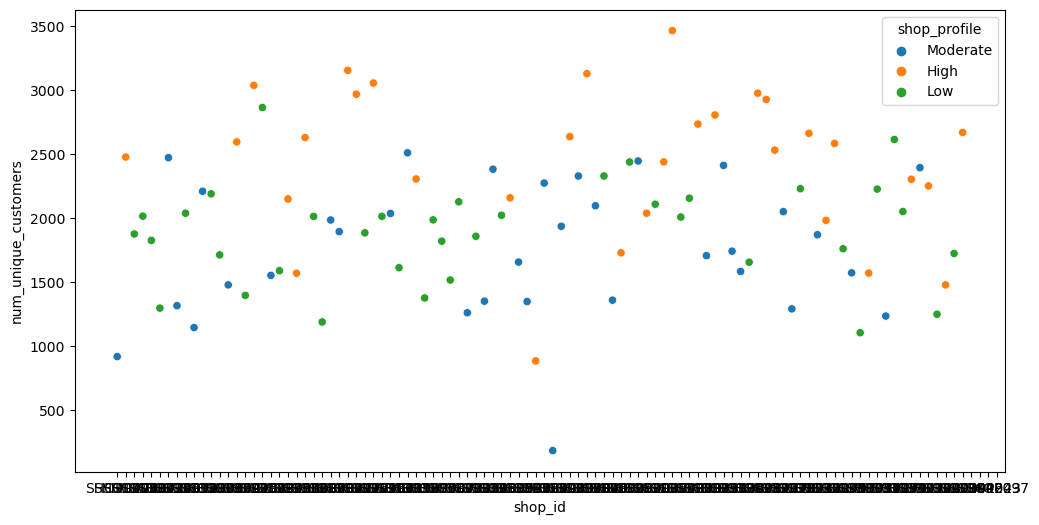

In [38]:
# scatter plot of number of unique customers and shop id hue by shop profile
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='shop_id', y='num_unique_customers', data=df1, hue='shop_profile', ax=ax)

In [39]:
item_per_shop = HistTrans.groupby('shop_id')['item_description'].nunique().reset_index(name='num_unique_items')
item_per_shop

,shop_id,num_unique_items
0,SHOP001,35
1,SHOP002,35
2,SHOP003,35
3,SHOP004,35
4,SHOP005,36
...,...,...
119,SHOP123,36
120,SHOP124,35
121,SHOP125,36
122,SHOP126,31


<Axes: xlabel='shop_id', ylabel='num_unique_items'>

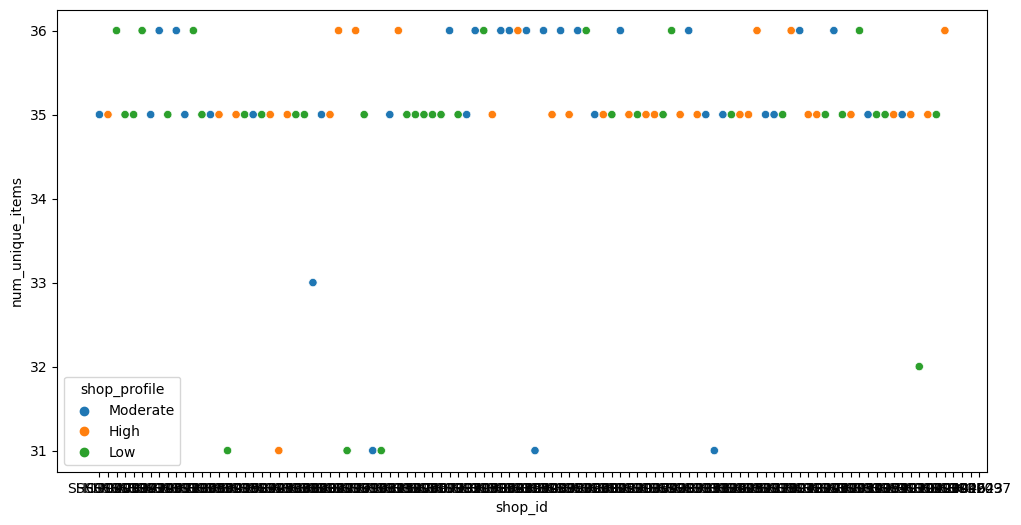

In [40]:
# plot of number of unique items and shop id hue by shop profile
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='shop_id', y='num_unique_items', data=pd.merge(pd.DataFrame(df1[['shop_id', 'shop_profile']]), item_per_shop, on='shop_id', how='left'), hue='shop_profile', ax=ax)

In [41]:
num_transactions_per_shop = HistTrans.groupby('shop_id').size().reset_index(name='num_transactions')
num_transactions_per_shop

,shop_id,num_transactions
0,SHOP001,1980
1,SHOP002,4721
2,SHOP003,3597
3,SHOP004,3392
4,SHOP005,4138
...,...,...
119,SHOP123,2035
120,SHOP124,4366
121,SHOP125,1838
122,SHOP126,3141


In [42]:
df1 = df1.merge(num_transactions_per_shop, how='left', on='shop_id')

<Axes: xlabel='shop_id', ylabel='num_transactions'>

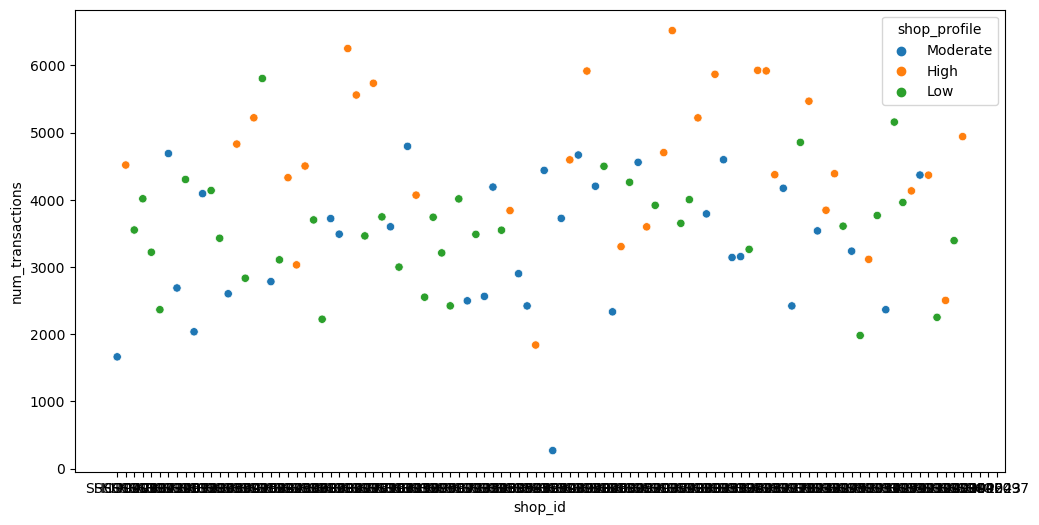

In [43]:
# scatter plot of number of transactions and shop id hue by shop profile
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='shop_id', y='num_transactions', data=df1, hue='shop_profile', ax=ax)

In [44]:
df1['sales_per_customer'] = df1['total_sales']/df1['num_transactions']
df1.head()

,shop_id,shop_area_sq_ft,shop_profile,median_daily_income,total_sales,total_sales_per_sqft,num_unique_customers,num_transactions,sales_per_customer
0,SHOP047,528,Moderate,335.000000,518100.0,981.250000,920,1662,311.732852
1,SHOP009,676,High,313.661972,1235110.0,1827.085799,2476,4517,273.435909
2,SHOP083,676,Low,334.921875,1097305.0,1623.232249,1876,3550,309.100000
3,SHOP117,676,Low,386.315789,1418840.0,2098.875740,2015,4015,353.384807
4,SHOP042,676,Low,312.763158,922495.0,1364.637574,1826,3219,286.578130


<Axes: xlabel='shop_id', ylabel='sales_per_customer'>

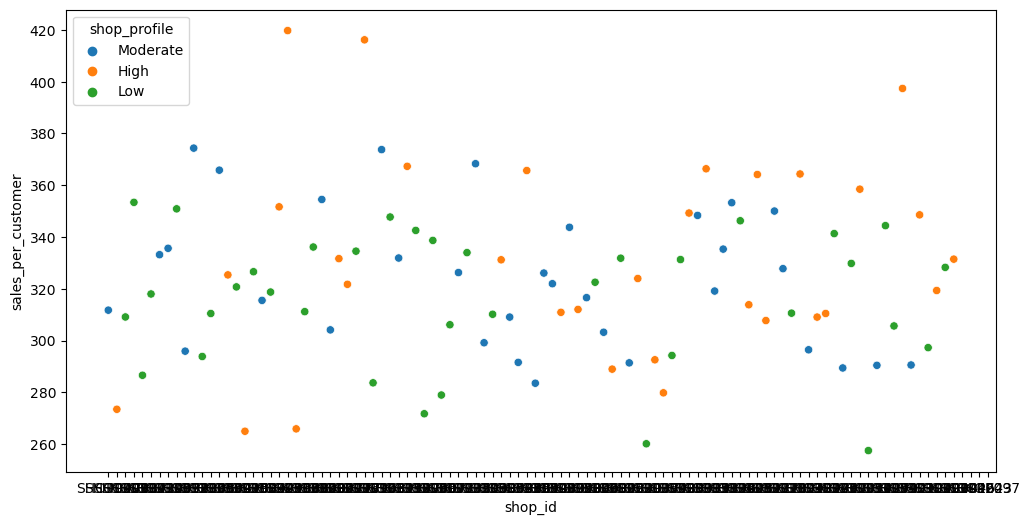

In [45]:
# scatter plot of sales per customer and shop id hue by shop profile
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='shop_id', y='sales_per_customer', data=df1, hue='shop_profile', ax=ax)

In [46]:
df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,brand,capacity,month,day,sale_amount,daily_income
0,ORANGE BARLEY 1.5L,2021-12-11,147.0,BGXA,SHOP008,220.0,2,ORANGE BARLEY,1.00,12,11,440.0,352.837838
1,GINGER BEER 1.5L,2021-10-17,371.0,IA25,SHOP112,220.0,2,GINGER BEER,1.00,10,17,440.0,349.500000
2,TONIC PET 500ML,2021-12-13,484.0,VN7V,SHOP008,160.0,2,TONIC PET,0.50,12,13,320.0,291.562500
3,CREAM SODA 1L,2021-12-13,484.0,VN7V,SHOP008,220.0,2,CREAM SODA,1.00,12,13,440.0,291.562500
4,STRAWBERRY MILK 180ML,2021-10-23,1310.0,7S00,SHOP112,210.0,5,STRAWBERRY MILK,0.18,10,23,1050.0,309.821429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473820,FIT O ORANGE 200ML,2021-11-14,8014206.0,ZEBZ,SHOP003,60.0,2,FIT O ORANGE,0.20,11,14,120.0,358.900000
473821,BOTTLED DRINKING WATER 500ML,2021-10-16,8304754.0,AFR6,SHOP127,35.0,2,BOTTLED DRINKING WATER,0.50,10,16,70.0,340.606061
473822,GINGER BEER 1.5L,2021-10-16,8304807.0,J2A6,SHOP127,220.0,1,GINGER BEER,1.00,10,16,220.0,340.606061
473823,BOTTLED DRINKING WATER 500ML,2021-11-07,8313570.0,1S0U,SHOP127,35.0,1,BOTTLED DRINKING WATER,0.50,11,7,35.0,539.038462


In [47]:
df.isnull().sum()

item_description    0
transaction_date    0
invoice_id          0
customer_id         0
shop_id             0
item_price          0
quantity_sold       0
brand               0
capacity            0
month               0
day                 0
sale_amount         0
daily_income        0
dtype: int64

In [48]:
# num_unique_customers_per squre feet
df1['num_unique_customers_per_sqft'] = df1['num_unique_customers'] / df1['shop_area_sq_ft']

In [49]:
# count for each number of quantities sold by each shop beverage by beverage
df.dropna()
beverage_count_df = df.groupby(['shop_id', 'item_description'])['quantity_sold'].sum().reset_index(name='num_quantities_sold')

In [50]:
# make a pivot table for each shop and the number of quantities sold for each beverage
beverage_count_df = beverage_count_df.pivot(index='shop_id', columns='item_description', values='num_quantities_sold').reset_index()
beverage_count_df.fillna(0, inplace=True)
beverage_count_df

item_description,shop_id,BOTTLED DRINKING WATER 1.5L,BOTTLED DRINKING WATER 500ML,CHOCOLATE MILK 180ML,CREAM SODA 1.5L,CREAM SODA 1L,CREAM SODA 500ML,CREAM SODA APPLE POP 1L,DRY GINGER ALE PET 500ML,FIT O MANGO 1L,...,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
0,SHOP001,63.0,201.0,0.0,355.0,26.0,151.0,90.0,24.0,33.0,...,199.0,53.0,20.0,27.0,99.0,135.0,97.0,26.0,130.0,21.0
1,SHOP002,121.0,380.0,0.0,1094.0,64.0,794.0,167.0,91.0,66.0,...,387.0,182.0,25.0,64.0,272.0,366.0,453.0,53.0,330.0,53.0
2,SHOP003,136.0,356.0,0.0,634.0,99.0,515.0,218.0,41.0,102.0,...,279.0,103.0,10.0,48.0,224.0,279.0,272.0,75.0,279.0,33.0
3,SHOP004,74.0,169.0,0.0,550.0,59.0,364.0,96.0,49.0,46.0,...,300.0,97.0,19.0,63.0,230.0,290.0,179.0,95.0,184.0,49.0
4,SHOP005,119.0,217.0,0.0,562.0,48.0,424.0,160.0,67.0,111.0,...,222.0,128.0,15.0,50.0,217.0,184.0,242.0,122.0,227.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,SHOP123,97.0,134.0,0.0,309.0,24.0,237.0,103.0,27.0,57.0,...,145.0,67.0,12.0,33.0,113.0,124.0,94.0,93.0,102.0,36.0
120,SHOP124,210.0,553.0,0.0,430.0,49.0,459.0,118.0,148.0,155.0,...,254.0,118.0,15.0,61.0,239.0,413.0,350.0,260.0,393.0,85.0
121,SHOP125,96.0,345.0,0.0,66.0,19.0,318.0,25.0,84.0,34.0,...,56.0,15.0,23.0,40.0,198.0,337.0,235.0,7.0,274.0,25.0
122,SHOP126,140.0,297.0,0.0,315.0,0.0,561.0,123.0,210.0,72.0,...,287.0,59.0,0.0,64.0,302.0,442.0,216.0,160.0,407.0,43.0


In [51]:
df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,brand,capacity,month,day,sale_amount,daily_income
0,ORANGE BARLEY 1.5L,2021-12-11,147.0,BGXA,SHOP008,220.0,2,ORANGE BARLEY,1.00,12,11,440.0,352.837838
1,GINGER BEER 1.5L,2021-10-17,371.0,IA25,SHOP112,220.0,2,GINGER BEER,1.00,10,17,440.0,349.500000
2,TONIC PET 500ML,2021-12-13,484.0,VN7V,SHOP008,160.0,2,TONIC PET,0.50,12,13,320.0,291.562500
3,CREAM SODA 1L,2021-12-13,484.0,VN7V,SHOP008,220.0,2,CREAM SODA,1.00,12,13,440.0,291.562500
4,STRAWBERRY MILK 180ML,2021-10-23,1310.0,7S00,SHOP112,210.0,5,STRAWBERRY MILK,0.18,10,23,1050.0,309.821429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473820,FIT O ORANGE 200ML,2021-11-14,8014206.0,ZEBZ,SHOP003,60.0,2,FIT O ORANGE,0.20,11,14,120.0,358.900000
473821,BOTTLED DRINKING WATER 500ML,2021-10-16,8304754.0,AFR6,SHOP127,35.0,2,BOTTLED DRINKING WATER,0.50,10,16,70.0,340.606061
473822,GINGER BEER 1.5L,2021-10-16,8304807.0,J2A6,SHOP127,220.0,1,GINGER BEER,1.00,10,16,220.0,340.606061
473823,BOTTLED DRINKING WATER 500ML,2021-11-07,8313570.0,1S0U,SHOP127,35.0,1,BOTTLED DRINKING WATER,0.50,11,7,35.0,539.038462


In [52]:
df1 = df1.merge(beverage_count_df, how='left', on='shop_id')

In [53]:
# select the weekend transactions using the transaction_date column
weekend_df = df[df['transaction_date'].dt.dayofweek.isin([4, 5, 6])]
weekend_df = pd.DataFrame(weekend_df)
# weekend_df["date"] = pd.to_datetime(weekend_df["transaction_date"])

# Extract the week number and year from the date column
weekend_df["week_year"] = df["transaction_date"].dt.isocalendar().week.astype(str) + "/" + df["transaction_date"].dt.isocalendar().year.astype(str)

# Group by the week_year column and count the number of unique shops
weekend_count_df = weekend_df.groupby("shop_id")["week_year"].nunique().reset_index(name="num_weekends")

In [54]:
# count the number of unique customers for each shop on the weekend and rename the column
weekend_customers = weekend_df.groupby('shop_id')['customer_id'].nunique().reset_index(name='num_unique_customers_weekend')

# merge the weekend customers with the df1 dataframe
df1 = df1.merge(weekend_customers, how='left', on='shop_id')

In [55]:
# total income for each shop on the weekend
weekend_income = weekend_df.groupby('shop_id')['sale_amount'].sum().reset_index(name='total_income_weekend')

# merge the weekend income with the df1 dataframe
df1 = df1.merge(weekend_income, how='left', on='shop_id')

In [56]:
df1 = df1.merge(weekend_count_df, how='left', on='shop_id')
df1['num_unique_customers_weekend_per_week'] = df1['num_unique_customers_weekend'] / df1['num_weekends']
df1['total_income_weekend_per_week'] = df1['total_income_weekend'] / df1['num_weekends']
# df1.drop(columns=['num_weekends'], inplace=True)

In [57]:
# brand_df = pd.DataFrame(df.dropna()[['shop_id', 'brand']]).groupby('shop_id')['brand'].unique().reset_index(name='brands')

# # get all brands in the dataset
# all_brands = set(df.dropna()['brand'])

# # create a column for each brand and set the value to 1 if the shop sells the brand and 0 otherwise
# for brand in all_brands:
#     brand_df[brand] = brand_df['brands'].apply(lambda x: 1 if brand in x else 0)

# brand_df.drop('brands', axis=1, inplace=True)
# brand_df

In [58]:
# # merge the brand_df with df1
# df1 = df1.merge(brand_df, how='left', on='shop_id')
# df1.head()

### Check NaN values

In [59]:
len(df1['shop_id'].unique().tolist())

124

### Drop unwanted Features

In [60]:
df.drop(['item_description', 'invoice_id','customer_id', 'month', 'day'], axis=1, inplace=True)

#### Corrolation



If we fit highly corrolated data in our model, it results in the overfitting probelm. Thus, for example if there are two highly corrolated features we have to drop the one that has more corrolation with other feature.

C:\Users\tharo\AppData\Local\Temp\ipykernel_18400\57575398.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


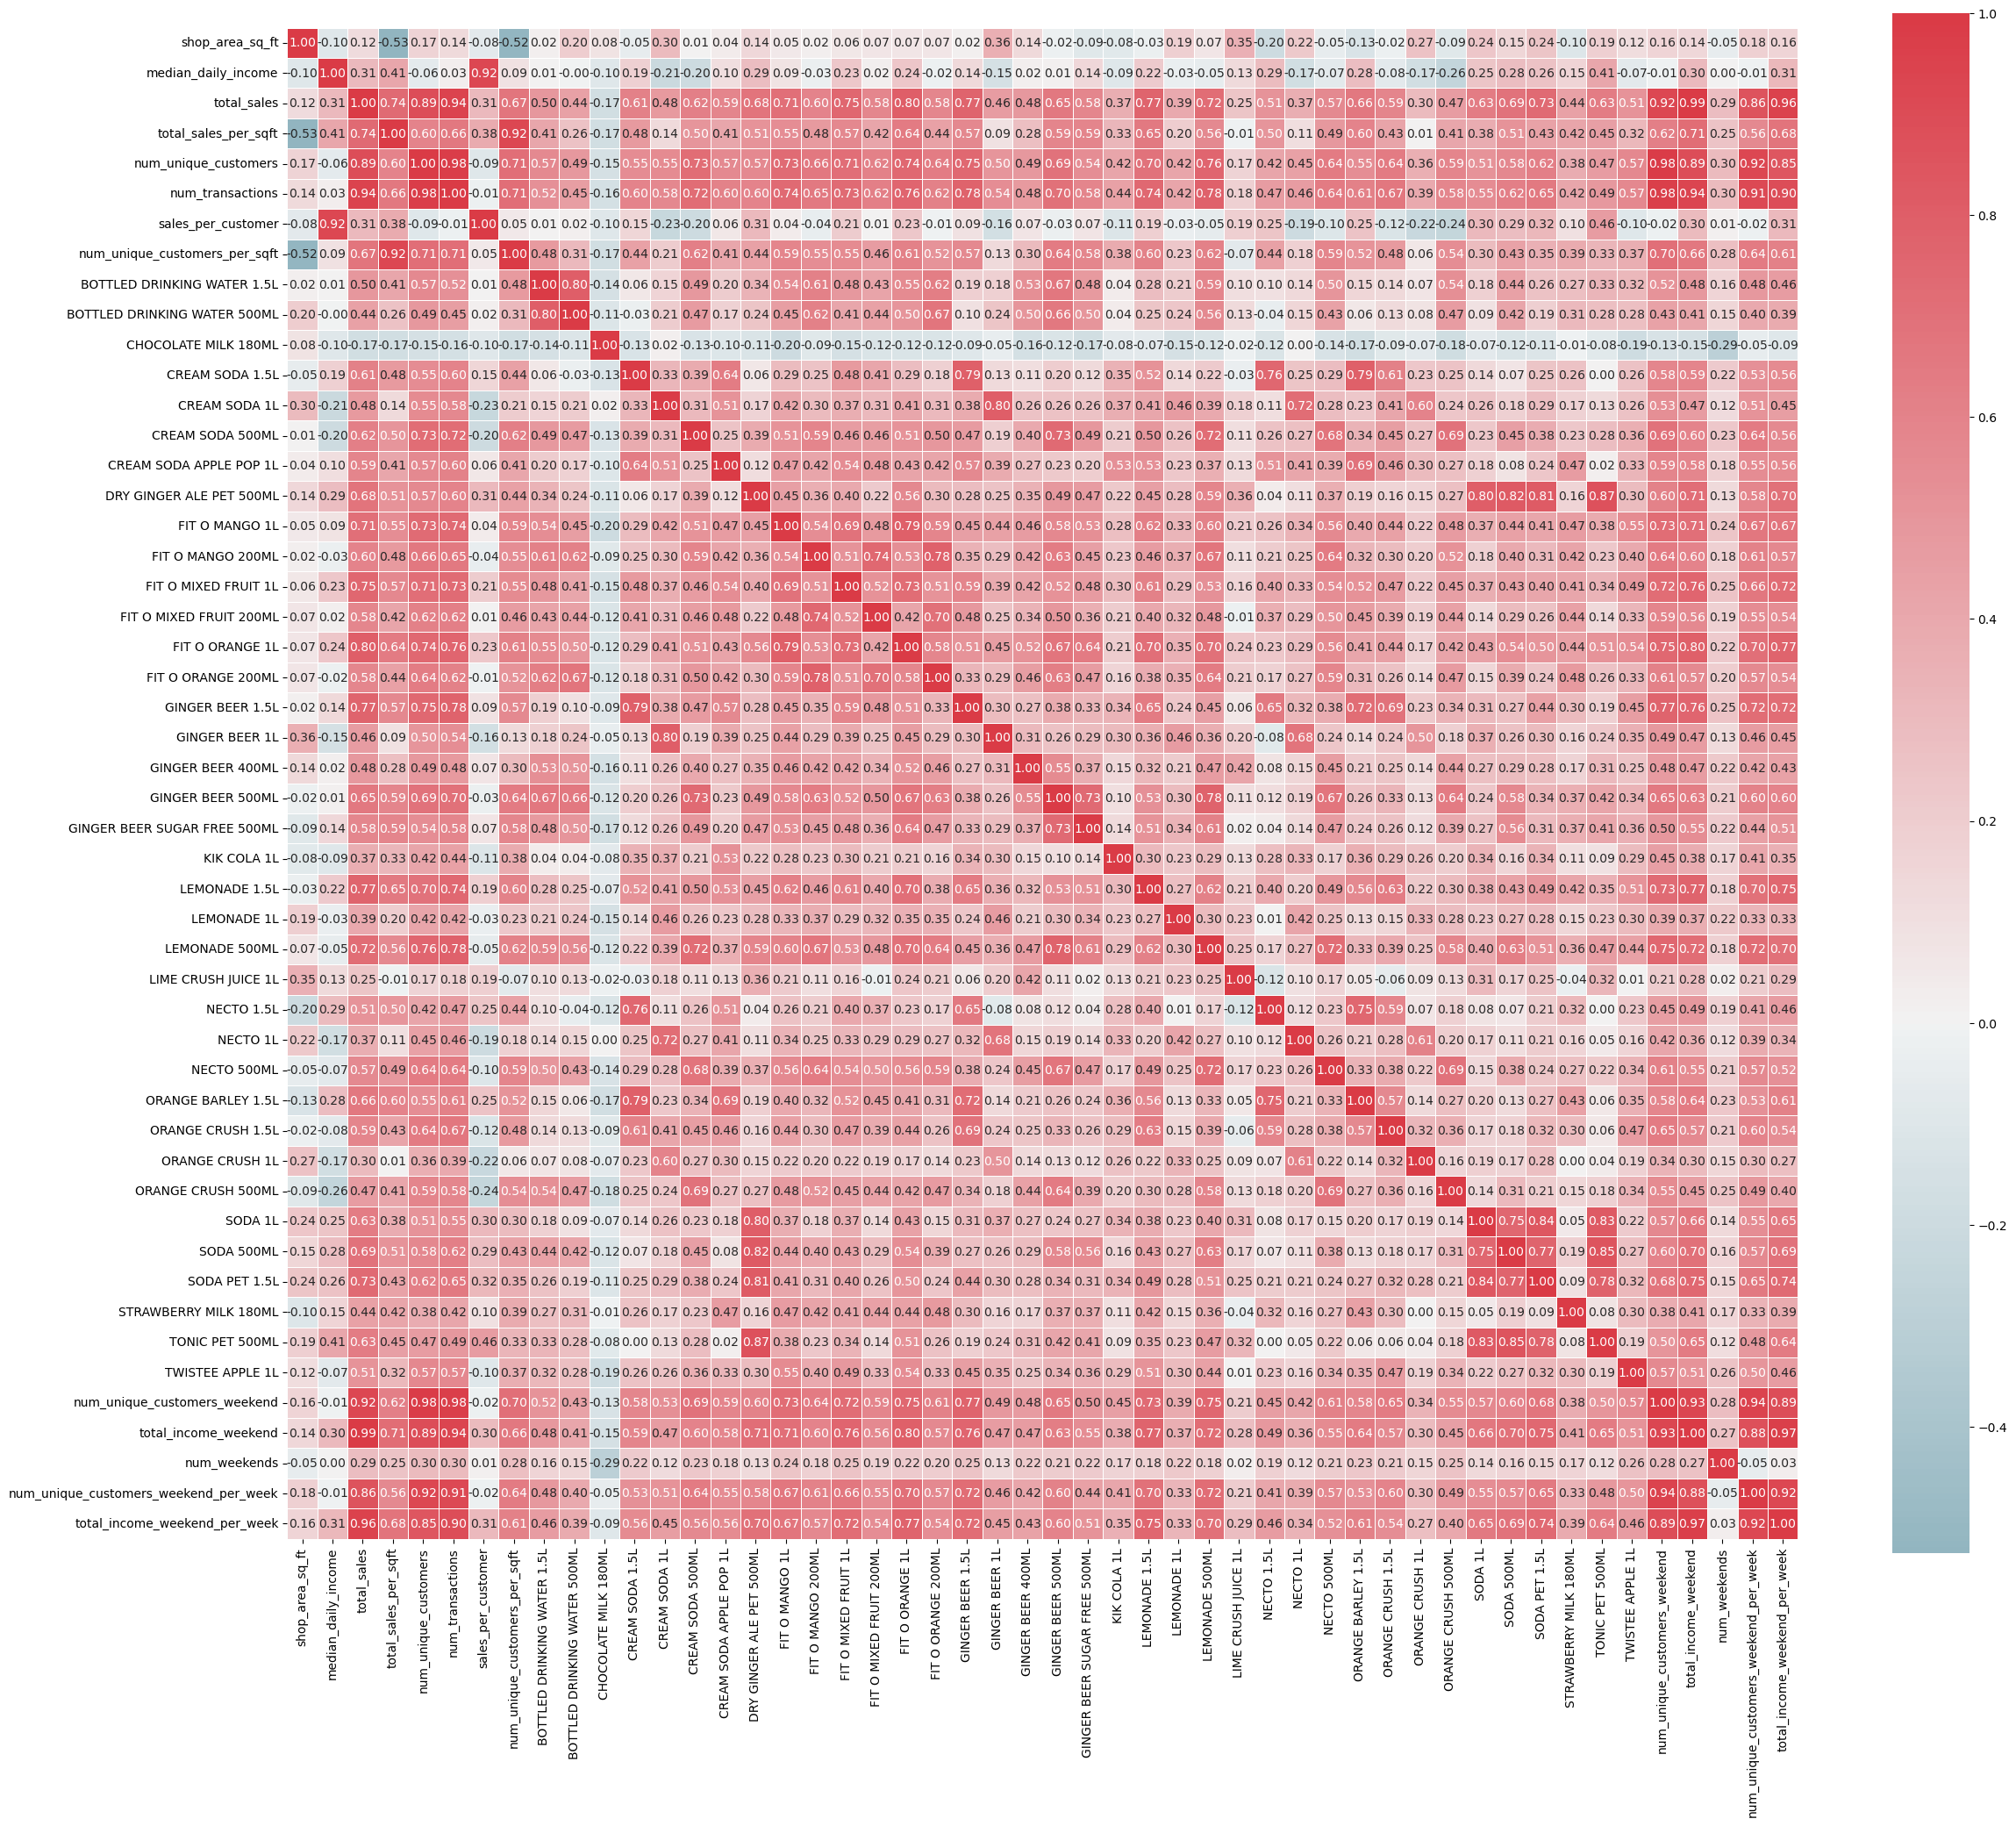

In [61]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(25, 25))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df1,x=True)

Feature Importance

In [62]:
# clf = ExtraTreesClassifier(n_estimators=250,
#                               random_state=SEED)

# clf.fit(X_train, y_train)

# # #############################################################################
# # Plot feature importance
# feature_importance = clf.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

### Divide Train and Test data

In [63]:
# list down all the coloumns
df1.columns

Index(['shop_id', 'shop_area_sq_ft', 'shop_profile', 'median_daily_income',
       'total_sales', 'total_sales_per_sqft', 'num_unique_customers',
       'num_transactions', 'sales_per_customer',
       'num_unique_customers_per_sqft', 'BOTTLED DRINKING WATER 1.5L',
       'BOTTLED DRINKING WATER 500ML', 'CHOCOLATE MILK 180ML',
       'CREAM SODA 1.5L', 'CREAM SODA 1L', 'CREAM SODA 500ML',
       'CREAM SODA APPLE POP 1L', 'DRY GINGER ALE PET 500ML', 'FIT O MANGO 1L',
       'FIT O MANGO 200ML', 'FIT O MIXED FRUIT 1L', 'FIT O MIXED FRUIT 200ML',
       'FIT O ORANGE 1L', 'FIT O ORANGE 200ML', 'GINGER BEER 1.5L',
       'GINGER BEER 1L', 'GINGER BEER 400ML', 'GINGER BEER 500ML',
       'GINGER BEER SUGAR FREE 500ML', 'KIK COLA 1L', 'LEMONADE 1.5L',
       'LEMONADE 1L', 'LEMONADE 500ML', 'LIME CRUSH JUICE 1L', 'NECTO 1.5L',
       'NECTO 1L', 'NECTO 500ML', 'ORANGE BARLEY 1.5L', 'ORANGE CRUSH 1.5L',
       'ORANGE CRUSH 1L', 'ORANGE CRUSH 500ML', 'SODA 1L', 'SODA 500ML',
       'SODA PET

In [64]:
corr_test_df = df1.drop(['shop_id', 'shop_profile'], axis=1)

<Axes: >

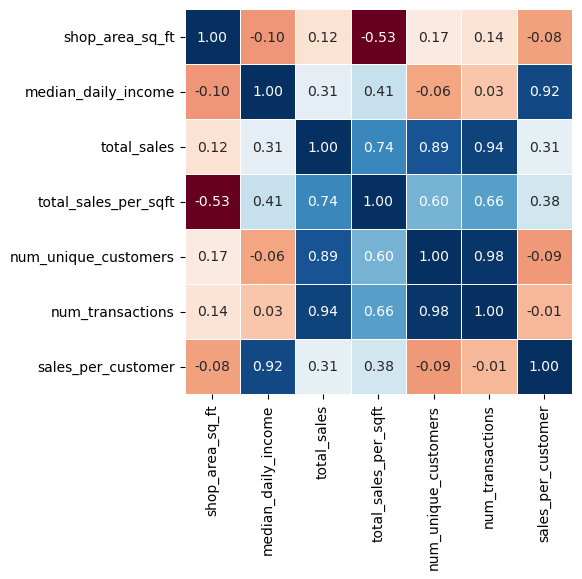

In [65]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_test_df[['shop_area_sq_ft', 'median_daily_income', 'total_sales', 'total_sales_per_sqft', 'num_unique_customers', 'num_transactions', 'sales_per_customer']].corr(), annot=True, ax=ax, cmap='RdBu', linewidths=0.5, fmt='.2f', annot_kws={'size': 10}, cbar=False)

<Axes: >

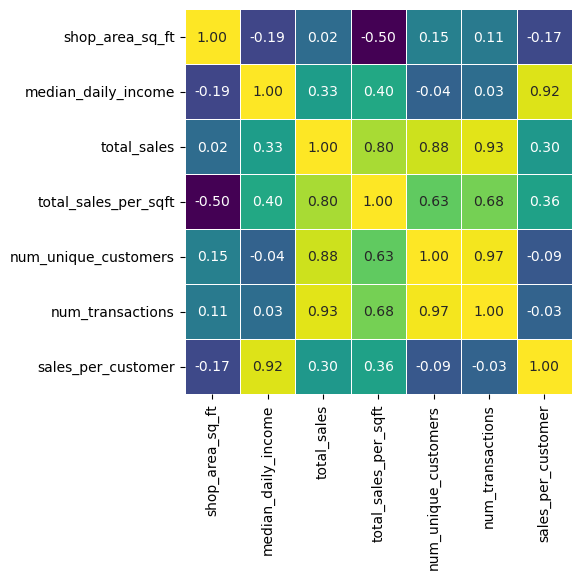

In [66]:
# spearson's rank correlation coefficient heatmap
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_test_df[['shop_area_sq_ft', 'median_daily_income', 'total_sales', 'total_sales_per_sqft', 'num_unique_customers', 'num_transactions', 'sales_per_customer']].corr(method='spearman'), annot=True, ax=ax, cmap='viridis', linewidths=0.5, fmt='.2f', annot_kws={'size': 10}, cbar=False)

In [67]:
df_pred = df1[pd.isnull(df1['shop_profile'])]
df_pred = pd.DataFrame(df_pred)

In [68]:
df_pred2 = df_pred.drop(['shop_profile','shop_id'], axis=1)

In [69]:
df2 = df1.dropna()
df2.head()

,shop_id,shop_area_sq_ft,shop_profile,median_daily_income,total_sales,total_sales_per_sqft,num_unique_customers,num_transactions,sales_per_customer,num_unique_customers_per_sqft,...,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L,num_unique_customers_weekend,total_income_weekend,num_weekends,num_unique_customers_weekend_per_week,total_income_weekend_per_week
0,SHOP047,528,Moderate,335.000000,518100.0,981.250000,920,1662,311.732852,1.742424,...,60.0,126.0,52.0,116.0,30.0,492,271862.5,9,54.666667,30206.944444
1,SHOP009,676,High,313.661972,1235110.0,1827.085799,2476,4517,273.435909,3.662722,...,219.0,144.0,53.0,135.0,51.0,1253,612420.0,9,139.222222,68046.666667
2,SHOP083,676,Low,334.921875,1097305.0,1623.232249,1876,3550,309.100000,2.775148,...,162.0,160.0,105.0,117.0,48.0,1061,597250.0,9,117.888889,66361.111111
3,SHOP117,676,Low,386.315789,1418840.0,2098.875740,2015,4015,353.384807,2.980769,...,418.0,509.0,98.0,390.0,43.0,1177,779180.0,9,130.777778,86575.555556
4,SHOP042,676,Low,312.763158,922495.0,1364.637574,1826,3219,286.578130,2.701183,...,211.0,165.0,108.0,136.0,48.0,982,506517.5,9,109.111111,56279.722222


In [70]:
#create a new dataframe containing shop_id , SODA 500ML, STRAWBERRY MILK 180ML
df3 = df2[['shop_id','SODA 500ML','STRAWBERRY MILK 180ML']]
df3.head()

#print the dataframe into png
df3.to_csv('df3.csv', index=False)

In [71]:
df2

,shop_id,shop_area_sq_ft,shop_profile,median_daily_income,total_sales,total_sales_per_sqft,num_unique_customers,num_transactions,sales_per_customer,num_unique_customers_per_sqft,...,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L,num_unique_customers_weekend,total_income_weekend,num_weekends,num_unique_customers_weekend_per_week,total_income_weekend_per_week
0,SHOP047,528,Moderate,335.000000,518100.0,981.250000,920,1662,311.732852,1.742424,...,60.0,126.0,52.0,116.0,30.0,492,271862.5,9,54.666667,30206.944444
1,SHOP009,676,High,313.661972,1235110.0,1827.085799,2476,4517,273.435909,3.662722,...,219.0,144.0,53.0,135.0,51.0,1253,612420.0,9,139.222222,68046.666667
2,SHOP083,676,Low,334.921875,1097305.0,1623.232249,1876,3550,309.100000,2.775148,...,162.0,160.0,105.0,117.0,48.0,1061,597250.0,9,117.888889,66361.111111
3,SHOP117,676,Low,386.315789,1418840.0,2098.875740,2015,4015,353.384807,2.980769,...,418.0,509.0,98.0,390.0,43.0,1177,779180.0,9,130.777778,86575.555556
4,SHOP042,676,Low,312.763158,922495.0,1364.637574,1826,3219,286.578130,2.701183,...,211.0,165.0,108.0,136.0,48.0,982,506517.5,9,109.111111,56279.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SHOP124,606,High,374.405941,1521807.5,2511.233498,2251,4366,348.558749,3.714521,...,413.0,350.0,260.0,393.0,85.0,1246,769830.0,9,138.444444,85536.666667
96,SHOP012,336,Low,282.127660,668832.5,1990.572917,1250,2250,297.258889,3.720238,...,77.0,83.0,105.0,102.0,40.0,658,314695.0,9,73.111111,34966.111111
97,SHOP093,705,High,326.578947,798960.0,1133.276596,1479,2502,319.328537,2.097872,...,165.0,144.0,62.0,129.0,34.0,767,431882.5,9,85.222222,47986.944444
98,SHOP004,516,Low,339.363636,1113467.5,2157.882752,1724,3392,328.262824,3.341085,...,290.0,179.0,95.0,184.0,49.0,997,601522.5,9,110.777778,66835.833333


In [72]:
X = df2.drop(['shop_profile', 'shop_id'], axis=1)
y = df2['shop_profile']

In [73]:
X.columns

Index(['shop_area_sq_ft', 'median_daily_income', 'total_sales',
       'total_sales_per_sqft', 'num_unique_customers', 'num_transactions',
       'sales_per_customer', 'num_unique_customers_per_sqft',
       'BOTTLED DRINKING WATER 1.5L', 'BOTTLED DRINKING WATER 500ML',
       'CHOCOLATE MILK 180ML', 'CREAM SODA 1.5L', 'CREAM SODA 1L',
       'CREAM SODA 500ML', 'CREAM SODA APPLE POP 1L',
       'DRY GINGER ALE PET 500ML', 'FIT O MANGO 1L', 'FIT O MANGO 200ML',
       'FIT O MIXED FRUIT 1L', 'FIT O MIXED FRUIT 200ML', 'FIT O ORANGE 1L',
       'FIT O ORANGE 200ML', 'GINGER BEER 1.5L', 'GINGER BEER 1L',
       'GINGER BEER 400ML', 'GINGER BEER 500ML',
       'GINGER BEER SUGAR FREE 500ML', 'KIK COLA 1L', 'LEMONADE 1.5L',
       'LEMONADE 1L', 'LEMONADE 500ML', 'LIME CRUSH JUICE 1L', 'NECTO 1.5L',
       'NECTO 1L', 'NECTO 500ML', 'ORANGE BARLEY 1.5L', 'ORANGE CRUSH 1.5L',
       'ORANGE CRUSH 1L', 'ORANGE CRUSH 500ML', 'SODA 1L', 'SODA 500ML',
       'SODA PET 1.5L', 'STRAWBERRY MILK 18

In [74]:
# # drop total sales, num_unique_customers, num_transactions, DRY GINGER ALE PET 500ML, num_unique_customers_weekend_per_week
# df_pred.drop(['total_sales', 'num_unique_customers', 'num_transactions', 'DRY GINGER ALE PET 500ML', 'num_unique_customers_weekend_per_week'], axis=1, inplace=True)
# X.drop(['total_sales', 'num_unique_customers', 'num_transactions', 'DRY GINGER ALE PET 500ML', 'num_unique_customers_weekend_per_week'], axis=1, inplace=True)

In [75]:
# # feature distribution histplots
# fig, axes = plt.subplots(8, 4, figsize=(15, 30))
# axes = axes.flatten()
# for i, col in enumerate(X_new_df.columns):
#     sns.histplot(X_new_df[col], ax=axes[i], kde=True, color='blue', edgecolor='black')
#     axes[i].set_title(col)
# plt.tight_layout()
# plt.show()

In [76]:
# skewness for each feature
# skew = X_new_df.skew()

# # log transform skewed features
# skewed_features = skew[abs(skew) > 0.5].index
# print(skewed_features)
# X_new_df[skewed_features] = np.log1p(X_new_df[skewed_features])

# X_pred_new_df[skewed_features] = np.log1p(X_pred_new_df[skewed_features])

# # feature distribution histplots
# fig, axes = plt.subplots(8, 4, figsize=(15, 30))
# axes = axes.flatten()
# for i, col in enumerate(X_new_df.columns):
#     sns.histplot(X_new_df[col], ax=axes[i], kde=True, color='blue', edgecolor='black')
#     axes[i].set_title(col)
# plt.tight_layout()
# plt.show()

In [77]:
# #split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# # get the shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 50) (20, 50) (80,) (20,)


#### Predictive modeling

In [79]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [80]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.35


In [81]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(X_train,y_train)
prediction2=model.predict(X_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,y_test))

Accuracy for linear SVM is 0.8


In [282]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.55


c:\Users\tharo\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction4=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.4


In [83]:
model=KNeighborsClassifier() 
model.fit(X_train,y_train)
prediction5=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,y_test))

The accuracy of the KNN is 0.35


C:\Users\tharo\AppData\Local\Temp\ipykernel_18400\1154764726.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
C:\Users\tharo\AppData\Local\Temp\ipykernel_18400\1154764726.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
C:\Users\tharo\AppData\Local\Temp\ipykernel_18400\1154764726.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
C:\Users\tharo\AppData\Local\Temp\ipykernel_18400\1154764726.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Ser

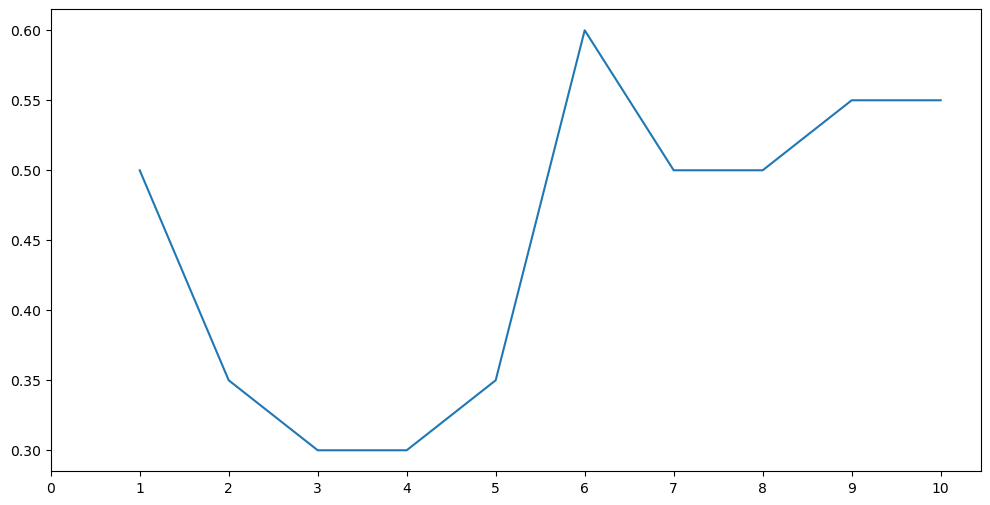

Accuracies for different values of n are: [0.5  0.35 0.3  0.3  0.35 0.6  0.5  0.5  0.55 0.55] with the max value as  0.6


In [84]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [85]:
model=GaussianNB()
model.fit(X_train,y_train)
prediction6=model.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.65


In [86]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction7=model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,y_test))

The accuracy of the Random Forests is 0.7


In [ ]:
# import torch
# from torch import nn

# # Define the input size, hidden sizes and output size
# input_size = 28
# hidden_sizes = [128, 64]
# output_size = 3

# # Build a feedforward network using nn.Sequential
# model = nn.Sequential(
#     nn.Linear(input_size, hidden_sizes[0]),
#     nn.Tanh(),
#     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
#     nn.Tanh(),
#     nn.Linear(hidden_sizes[1], output_size)
# )

# # Define the criterion as cross entropy loss
# criterion = nn.CrossEntropyLoss()

# # Define the optimizer as stochastic gradient descent
# optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.5)

# # Train the model for some epochs
# epochs = 3
# for epoch in range(epochs):
#     # Get the input and target data
#     inputs = # some tensor of shape (batch_size, input_size)
#     targets = # some tensor of shape (batch_size) containing the class labels
    
#     # Forward pass: compute predicted outputs by passing inputs to the model
#     outputs = model(inputs)
    
#     # Calculate the loss
#     loss = criterion(outputs, targets)
    
#     # Print the loss for every epoch
#     print(f"Epoch {epoch+1}, Loss: {loss.item()}")
    
#     # Backward pass: compute gradient of the loss with respect to model parameters
#     optimizer.zero_grad()
#     loss.backward()
    
#     # Update the model parameters
#     optimizer.step()

Cross Validation

In [87]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

c:\Users\tharo\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tharo\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

,CV Mean,Std
Linear Svm,0.56,0.135647
Radial Svm,0.41,0.144568
Logistic Regression,0.61,0.144568
KNN,0.41,0.122066
Decision Tree,0.51,0.094340
Naive Bayes,0.57,0.210000
Random Forest,0.64,0.162481


In [ ]:
# plt.subplots(figsize=(12,6))
# box=pd.DataFrame(accuracy,index=[classifiers])
# box.T.boxplot()

In [ ]:
# new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
# plt.title('Average CV Mean Accuracy')
# fig=plt.gcf()
# fig.set_size_inches(8,5)
# plt.show()

Confusion Matrix

c:\Users\tharo\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tharo\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

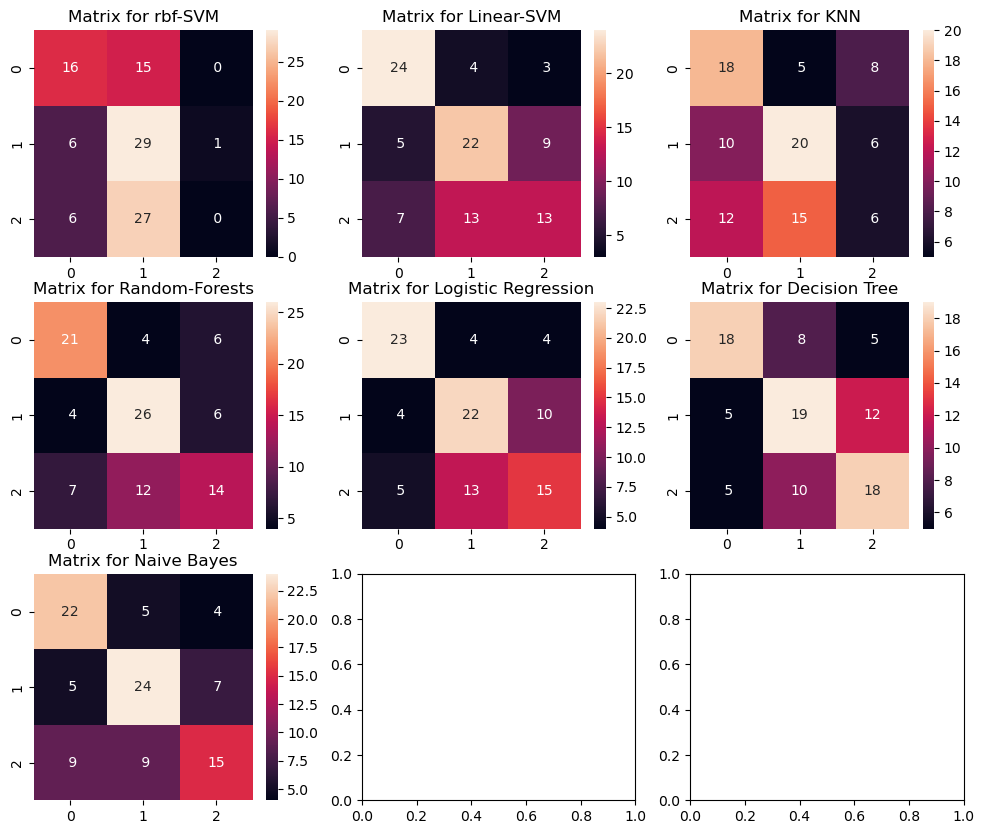

In [88]:

f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Hyper-Parameters Tuning

SVM

In [ ]:
# from sklearn.model_selection import GridSearchCV
# C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
# gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# kernel=['rbf','linear']
# hyper={'kernel':kernel,'C':C,'gamma':gamma}
# gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
# gd.fit(X,y)
# print(gd.best_score_)
# print(gd.best_estimator_)

Random Forests

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.67
RandomForestClassifier(n_estimators=600, random_state=0)


Ensembling

In [ ]:
# # Voting Classifier
# from sklearn.ensemble import VotingClassifier
# ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
#                                               ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
#                                               ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
#                                               ('LR',LogisticRegression(C=0.05)),
#                                               ('DT',DecisionTreeClassifier(random_state=0)),
#                                               ('NB',GaussianNB()),
#                                               ('svm',svm.SVC(kernel='linear',probability=True))
#                                              ], 
#                        voting='soft').fit(X_train,y_train)
# print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test, y_test))
# cross=cross_val_score(ensemble_lin_rbf,X,y, cv = 10,scoring = "accuracy")
# print('The cross validated score is',cross.mean())

In [ ]:
# #Bagging
# # Bagged KNN

# from sklearn.ensemble import BaggingClassifier
# model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
# model.fit(X_train,y_train)
# prediction=model.predict(X_test)
# print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,y_test))
# result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
# print('The cross validated score for bagged KNN is:',result.mean())

In [ ]:
# #Bagged DecisionTree
# model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
# model.fit(X_train,y_train)
# prediction=model.predict(X_test)
# print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,y_test))
# result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
# print('The cross validated score for bagged Decision Tree is:',result.mean())

Boosting

In [90]:
# AdaBoost(Adaptive Boosting)
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.5599999999999999


In [91]:
# Stochastic Gradient Boosting¶
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.5599999999999998


In [93]:
# convert unique values of `y` ['High' 'Low' 'Moderate'] to numerical values[0 1 2]
y = y.map({'High': 0, 'Moderate': 1, 'Low': 2}) 


In [94]:
# XGBoost
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.59


In [323]:
# # Hyper-Parameter Tuning for AdaBoost
# n_estimators=list(range(100,1100,100))
# learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
# hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
# gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
# gd.fit(X,y)
# print(gd.best_score_)
# print(gd.best_estimator_)

Confusion Matrix for the Best Model

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,y,cv=10)
sns.heatmap(confusion_matrix(y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

Feature Importance

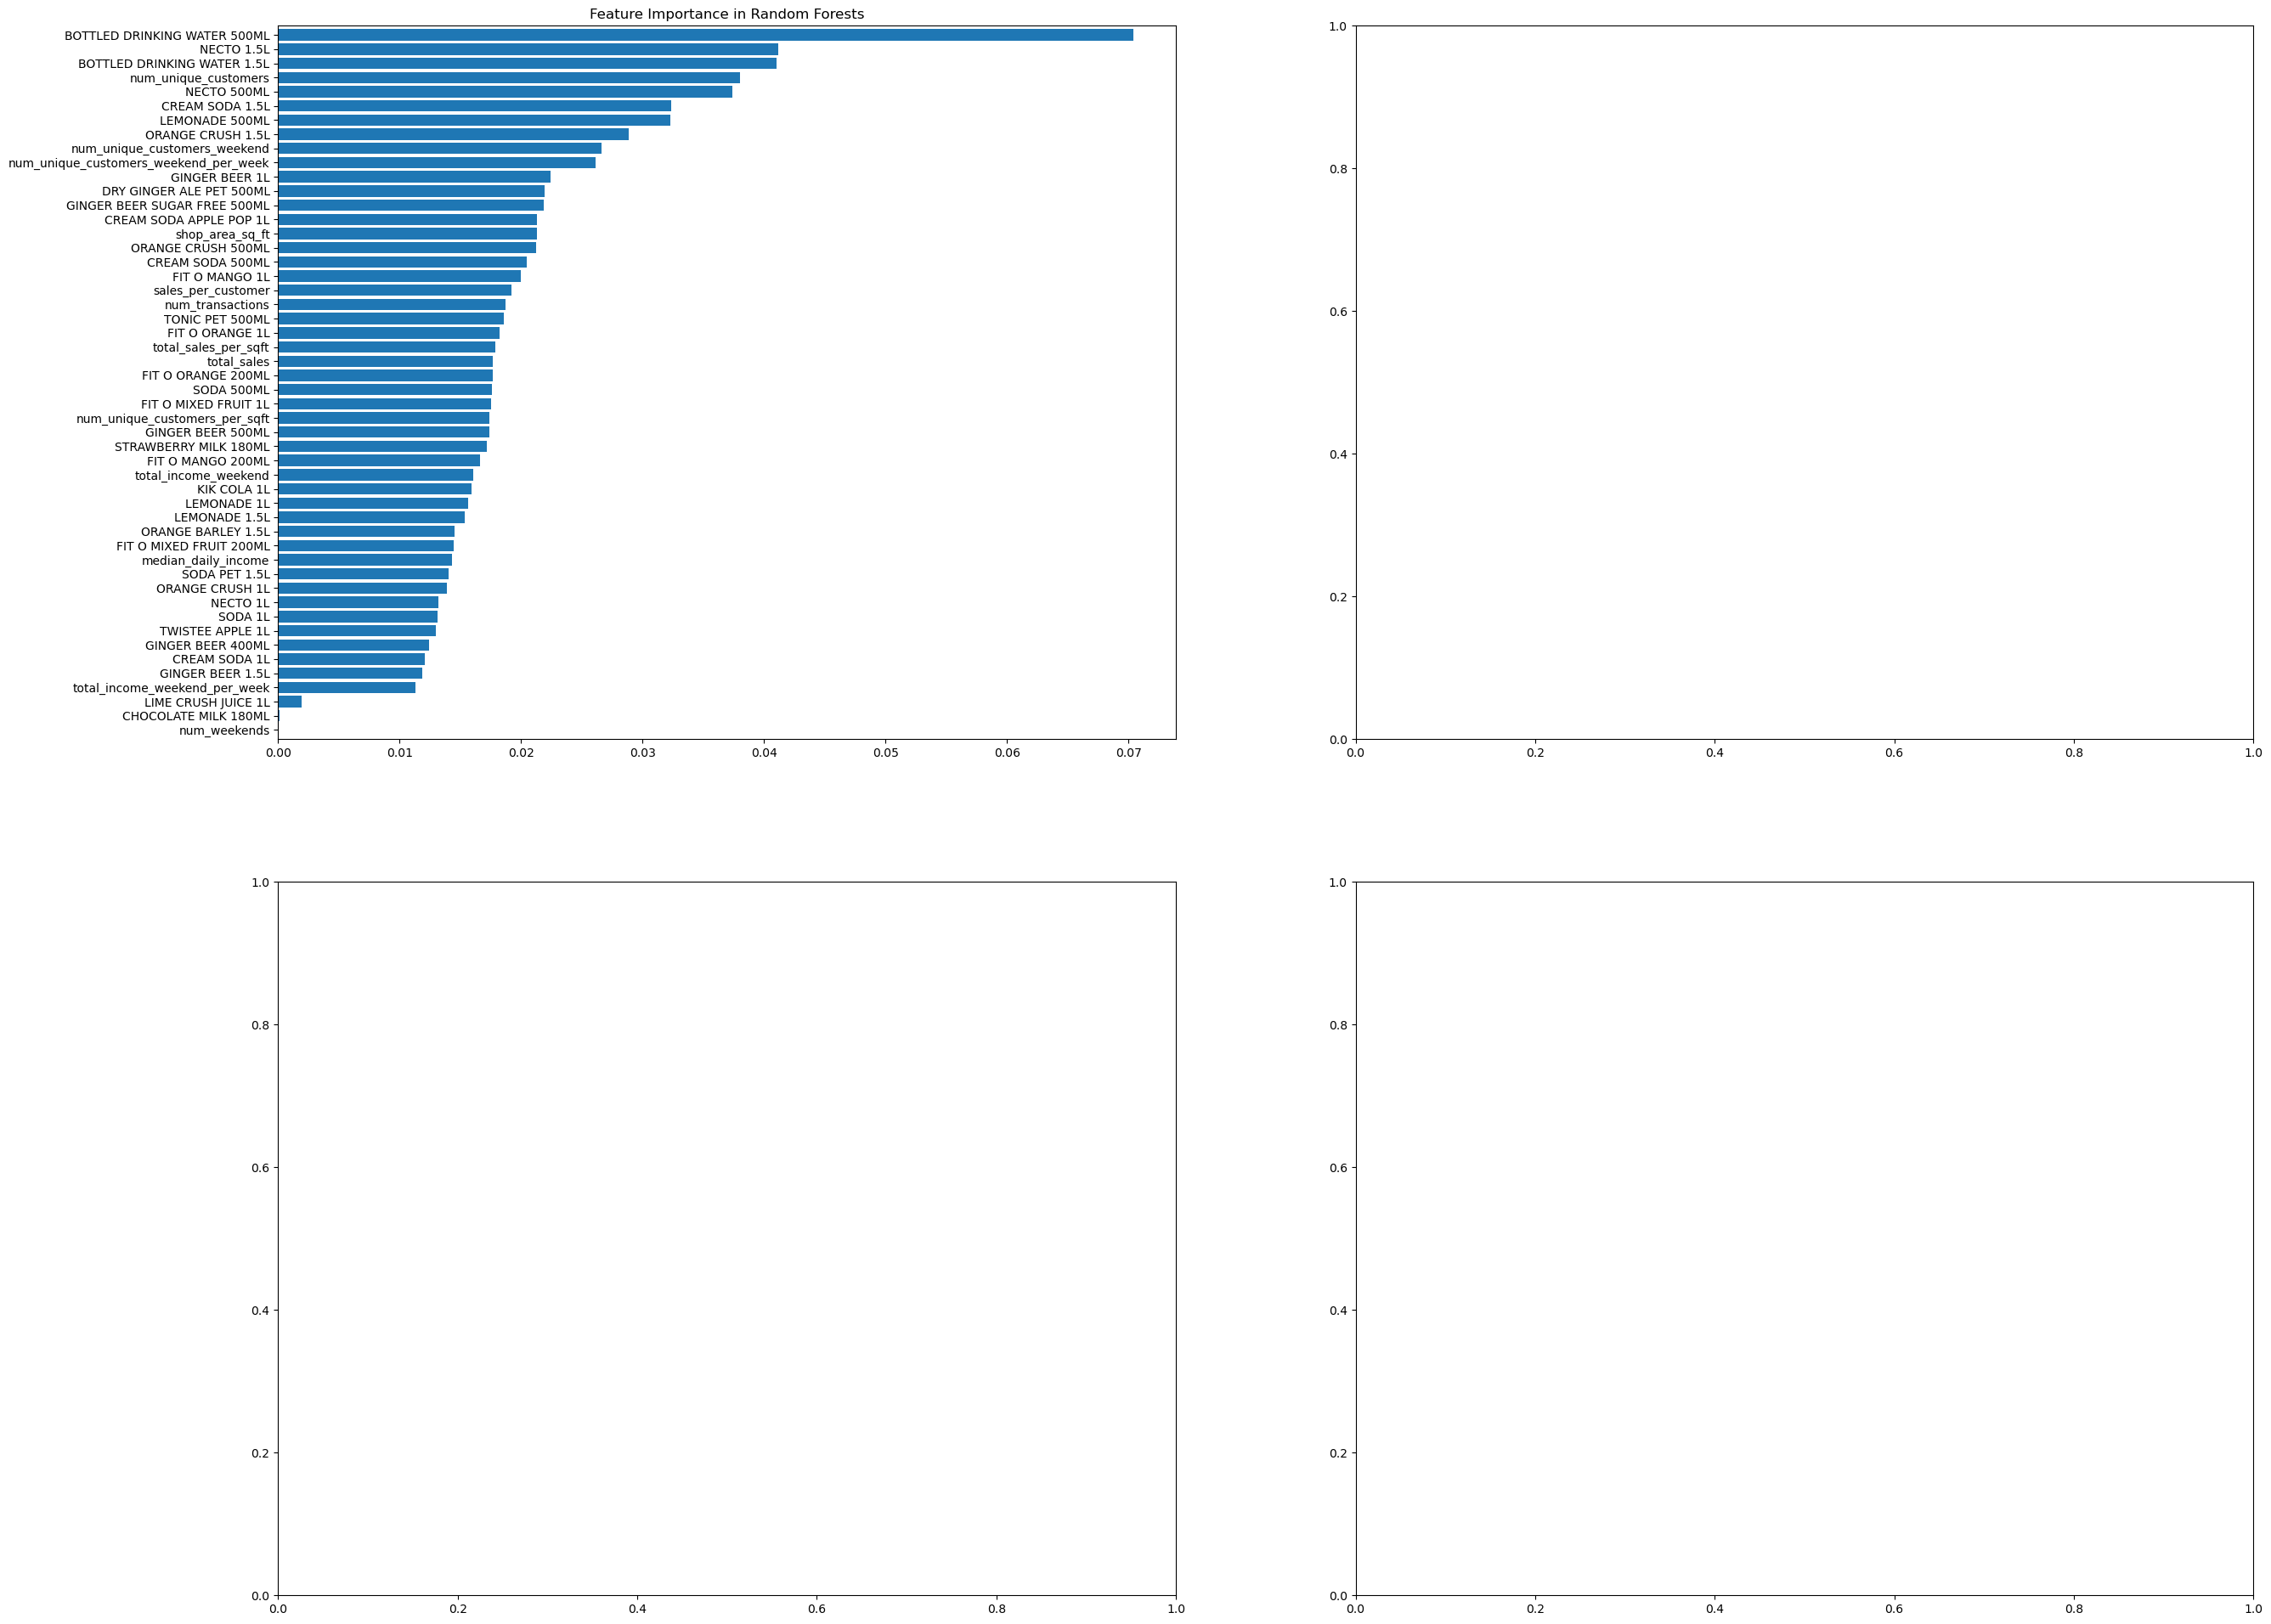

In [104]:
f,ax=plt.subplots(2,2,figsize=(30,24))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
# model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
# model.fit(X,y)
# pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
# ax[0,1].set_title('Feature Importance in AdaBoost')
# model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
# model.fit(X,y)
# pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
# ax[1,0].set_title('Feature Importance in Gradient Boosting')
# model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
# model.fit(X,y)
# pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
# ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

In [326]:
# # drop sales amount and sales amount per sqft from x and x_pred 
# X_train.drop(['SALE_AMOUNT', 'sale_amount_per_sqft'], axis=1, inplace=True)
# X_test.drop(['SALE_AMOUNT', 'sale_amount_per_sqft'], axis=1, inplace=True)

In [327]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [328]:
# scale features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

# X_test_scaled.shape, X_train_scaled.shape

In [329]:
# # scale features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_new_df)
# X_test_scaled = scaler.fit_transform(X_pred_new_df.drop(['index'], axis=1))

# X_test_scaled.shape, X_train_scaled.shape

In [172]:
# convert store_profile to numeric
y

0     Moderate
1         High
2          Low
3          Low
4          Low
        ...   
95        High
96         Low
97        High
98         Low
99        High
Name: shop_profile, Length: 100, dtype: object

In [331]:
# # create a dictionary to map the string values to integers
# mapping = {'Low': 0, 'Moderate': 1, 'High': 2}

# # replace the string values with the mapped integers
# y['store_profile'] = y['store_profile'].replace(mapping)

In [332]:
# import xgboost as xgb
# from sklearn.metrics import f1_score
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# # define the XGBoost classifier
# xgb_clf = xgb.XGBClassifier()

# # train the classifier on the training set
# xgb_clf.fit(X_train_scaled, y)

# # predict the labels of the test set
# y_pred = xgb_clf.predict(X_test_scaled)

# # calculate the F1 score of the predictions
# # f1 = f1_score(y_test, y_pred)
# y_pred

In [333]:
# hyperparameter tuning for random forest using RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import f1_score

# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
#     'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
#     'min_samples_split': [2, 5, 10, 15, 20],
#     'min_samples_leaf': [1, 2, 5, 10, 15],
#     'bootstrap': [True, False]
# }

# rf = RandomForestClassifier()

# rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# rf_random.fit(X, y)

# rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 20,
 'bootstrap': True}

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 35,
 'bootstrap': False}

In [173]:
# Create a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=20, bootstrap=True)

In [174]:
rf.fit(X, y)


RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=300)

In [175]:
# X_test_scaled.shape
df_pred.columns

Index(['shop_id', 'shop_area_sq_ft', 'shop_profile', 'median_daily_income',
       'total_sales', 'total_sales_per_sqft', 'num_unique_customers',
       'num_transactions', 'sales_per_customer',
       'num_unique_customers_per_sqft', 'BOTTLED DRINKING WATER 1.5L',
       'BOTTLED DRINKING WATER 500ML', 'CHOCOLATE MILK 180ML',
       'CREAM SODA 1.5L', 'CREAM SODA 1L', 'CREAM SODA 500ML',
       'CREAM SODA APPLE POP 1L', 'DRY GINGER ALE PET 500ML', 'FIT O MANGO 1L',
       'FIT O MANGO 200ML', 'FIT O MIXED FRUIT 1L', 'FIT O MIXED FRUIT 200ML',
       'FIT O ORANGE 1L', 'FIT O ORANGE 200ML', 'GINGER BEER 1.5L',
       'GINGER BEER 1L', 'GINGER BEER 400ML', 'GINGER BEER 500ML',
       'GINGER BEER SUGAR FREE 500ML', 'KIK COLA 1L', 'LEMONADE 1.5L',
       'LEMONADE 1L', 'LEMONADE 500ML', 'LIME CRUSH JUICE 1L', 'NECTO 1.5L',
       'NECTO 1L', 'NECTO 500ML', 'ORANGE BARLEY 1.5L', 'ORANGE CRUSH 1.5L',
       'ORANGE CRUSH 1L', 'ORANGE CRUSH 500ML', 'SODA 1L', 'SODA 500ML',
       'SODA PET

In [176]:
y_pred_r = rf.predict(df_pred2)

In [254]:
y_pred_r.shape

(24,)

In [255]:
new_pred_df = pd.DataFrame(y_pred_r, columns=['shop_profile'])
new_pred_df

,shop_profile
0,Moderate
1,Low
2,Low
3,Moderate
4,Low
5,Moderate
6,Moderate
7,Moderate
8,Low
9,Low


In [256]:
new_pred_df = pd.DataFrame(y_pred_r, columns=['shop_profile'])
new_pred_df = pd.DataFrame(df_pred['shop_id'].reset_index()).merge(new_pred_df, left_index=True, right_index=True)
new_pred_df = new_pred_df.drop(['index'], axis=1)
new_pred_df

,shop_id,shop_profile
0,SHOP046,Moderate
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,Low
5,SHOP030,Moderate
6,SHOP038,Moderate
7,SHOP029,Moderate
8,SHOP096,Low
9,SHOP092,Low


In [257]:

Test = pd.merge(Test, new_pred_df, on='shop_id', how='left')
Test.to_csv('E:\DSE\DataStorm 4.0\DataStorm077\Day4\Testing-data2-day4.csv', index=False)